In [128]:
'''A LendingClub é uma empresa americana de empréstimos peer-to-peer, com sede em São Francisco, Califórnia. Foi a primeira instituição de crédito peer-to-peer a registrar suas ofertas como valores mobiliários na Securities and Exchange Commission (SEC) e a oferecer negociação de empréstimos em um mercado secundário. A LendingClub é a maior plataforma de empréstimos peer-to-peer do mundo.
Nosso Objetivo com base em dados históricos sobre empréstimos concedidos, com informações sobre a inadimplência ou não do mutuário (baixa), podemos construir um modelo que possa prever se um mutuário pagará ou não o empréstimo. Dessa forma, no futuro, quando conquistarmos um novo cliente em potencial, poderemos avaliar se ele provavelmente pagará o empréstimo.'''

'A LendingClub é uma empresa americana de empréstimos peer-to-peer, com sede em São Francisco, Califórnia. Foi a primeira instituição de crédito peer-to-peer a registrar suas ofertas como valores mobiliários na Securities and Exchange Commission (SEC) e a oferecer negociação de empréstimos em um mercado secundário. A LendingClub é a maior plataforma de empréstimos peer-to-peer do mundo.\nNosso Objetivo com base em dados históricos sobre empréstimos concedidos, com informações sobre a inadimplência ou não do mutuário (baixa), podemos construir um modelo que possa prever se um mutuário pagará ou não o empréstimo. Dessa forma, no futuro, quando conquistarmos um novo cliente em potencial, poderemos avaliar se ele provavelmente pagará o empréstimo.'

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, roc_auc_score
import joblib

In [130]:
data_info = pd.read_csv('lending_club_info.csv', index_col='LoanStatNew')

In [131]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [132]:
def feat_info(col_name):
  print(data_info.loc[col_name]['Description'])

In [133]:
feat_info('mort_acc')

Number of mortgage accounts.


| Coluna | Tipo | Descrição |
|--------|------|-----------|
| **loan_status** | Categórica | Status final: "Fully Paid" ou "Charged Off" |
| **loan_amnt** | Numérica | Valor do empréstimo ($500-$40,000) |
| **term** | Categórica | Prazo em meses: 36 ou 60 |
| **int_rate** | Numérica | Taxa de juros anual (%) |
| **installment** | Numérica | Parcela mensal |
| **grade** | Categórica | Grade de risco: A, B, C, D, E, F, G |
| **sub_grade** | Categórica | Sub-grade de risco: A1-G5 |
| **emp_title** | Categórica | Título de trabalho |
| **emp_length** | Categórica | Tempo de emprego (0-10 anos) |
| **annual_inc** | Numérica | Renda anual |
| **dti** | Numérica | Razão Dívida/Renda |
| **home_ownership** | Categórica | RENT, OWN, MORTGAGE, OTHER |
| **verification_status** | Categórica | Verified, Source Verified, Not Verified |
| **application_type** | Categórica | Individual ou Joint |
| **earliest_cr_line** | Data | Data da primeira linha de crédito |
| **open_acc** | Numérica | Número de contas abertas |
| **pub_rec** | Numérica | Registros públicos negativos |
| **revol_bal** | Numérica | Saldo de crédito rotativo |
| **revol_util** | Numérica | Taxa de utilização de crédito (%) |
| **total_acc** | Numérica | Total de contas de crédito |
| **mort_acc** | Numérica | Número de contas de hipoteca |
| **pub_rec_bankruptcies** | Numérica | Número de falências |
| **issue_d** | Data | Data de emissão do empréstimo |
| **zip_code** | Categórica | Primeiros 3 dígitos do CEP |
| **addr_state** | Categórica | Estado (EUA) |
| **purpose** | Categórica | Propósito do empréstimo |
| **title** | Categórica | Título descritivo do empréstimo |
| **initial_list_status** | Categórica | Status inicial: W ou F |

In [134]:
df = pd.read_csv('lending_club_loan_two.csv')

Seção 1: Análise exploratória de dados

<Axes: xlabel='loan_status', ylabel='count'>

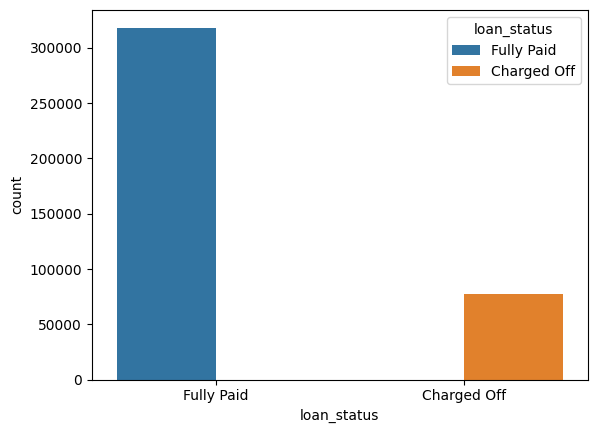

In [135]:
sns.countplot(x='loan_status', data=df, hue='loan_status')

<Axes: xlabel='loan_amnt', ylabel='Count'>

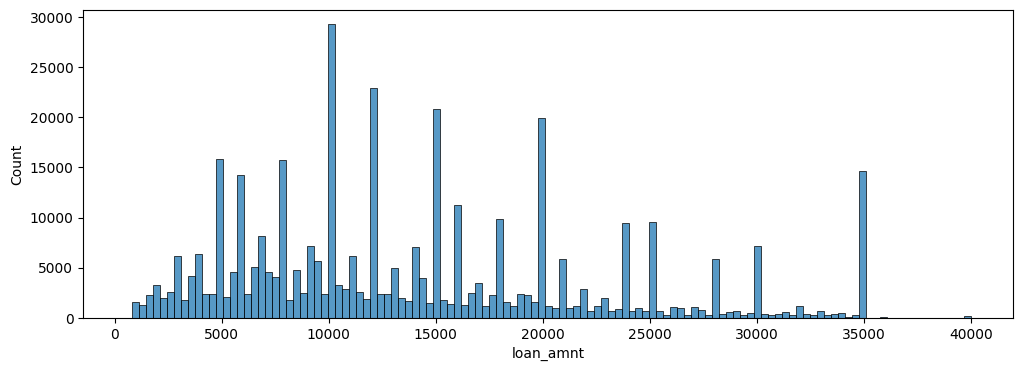

In [136]:
plt.figure(figsize=(12,4))
sns.histplot(df['loan_amnt'])

In [137]:
df.corr(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<Axes: >

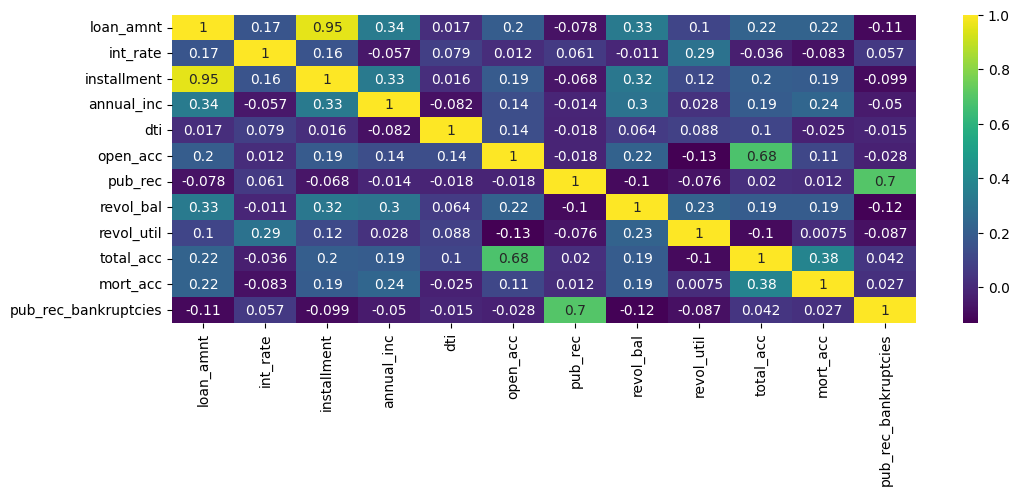

In [138]:
plt.figure(figsize=(12,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')

In [139]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [140]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<Axes: xlabel='installment', ylabel='loan_amnt'>

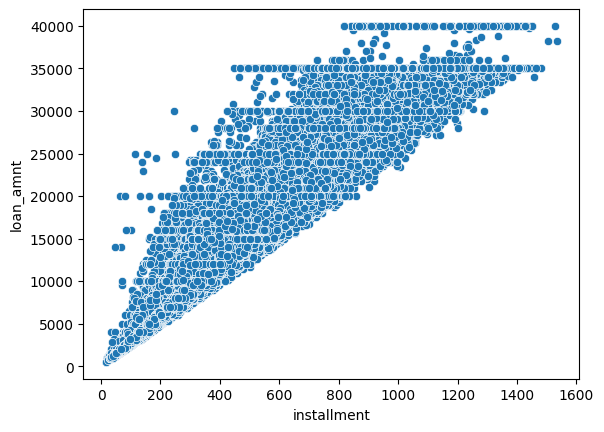

In [141]:
sns.scatterplot(x='installment', y = 'loan_amnt', data=df)

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

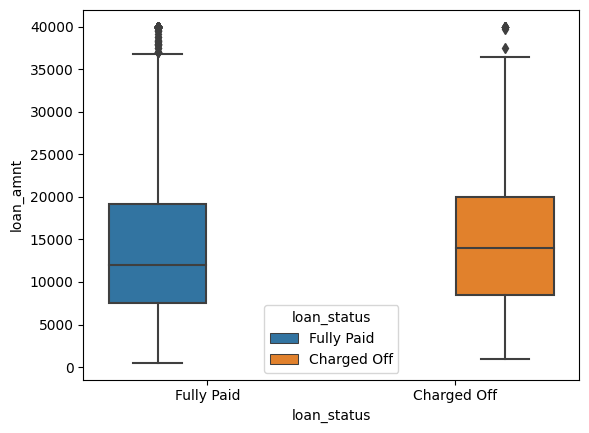

In [142]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df, hue='loan_status')

In [143]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [144]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [145]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<Axes: xlabel='grade', ylabel='count'>

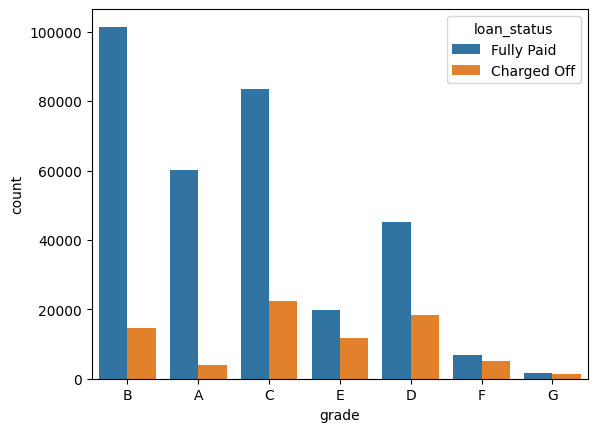

In [146]:
sns.countplot(x='grade', data=df, hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

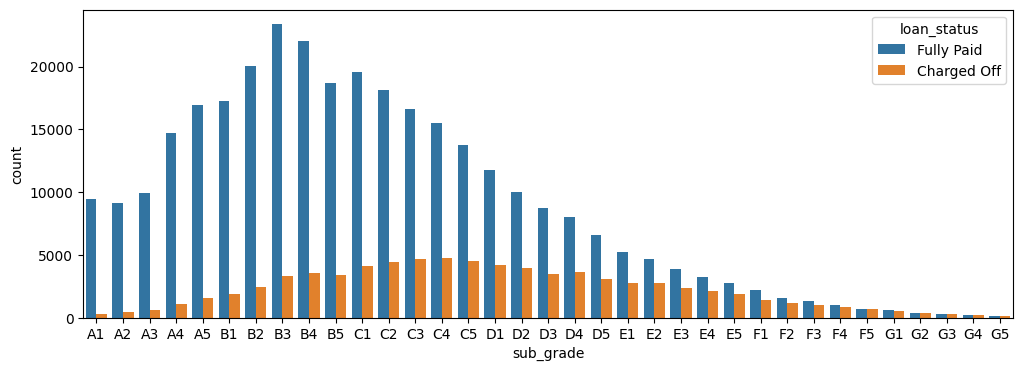

In [147]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df, order=subgrade_order, hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

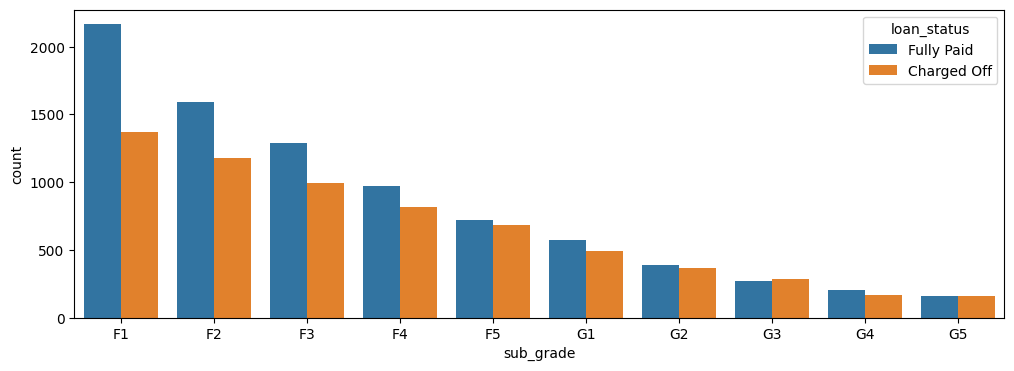

In [148]:
f_and_g = df[(df['grade']=='G')|(df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade', data=f_and_g, order=subgrade_order,hue='loan_status')

In [149]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

In [150]:
df['loan_repaid'].value_counts()

loan_repaid
1    318357
0     77673
Name: count, dtype: int64

In [151]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<Axes: >

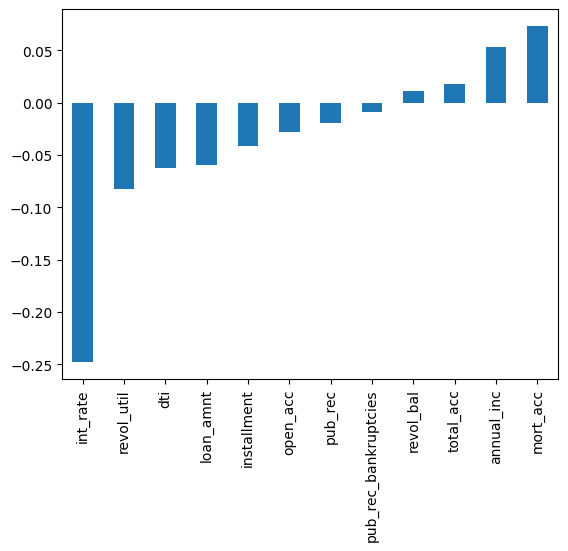

In [152]:
df.corr(numeric_only=True)['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

## Tratamento de dados

Dados faltantes

In [153]:
len(df)

396030

In [154]:
pd.Series(df.isnull().sum())

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [155]:
(pd.Series(df.isnull().sum()))/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [156]:
feat_info('emp_title')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [157]:
df['emp_title'].nunique()

173105

Existem muitos rótulos para serem convertidos em dummy's, desta forma optou-se pela remoção desta coluna (emp_title).

In [158]:
df.drop('emp_title', axis=1, inplace=True)

In [159]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [160]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<Axes: xlabel='emp_length', ylabel='count'>

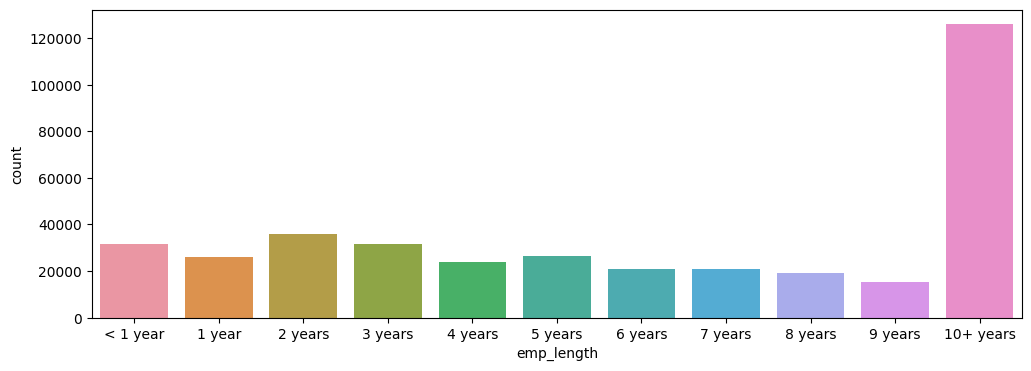

In [161]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df,order=emp_length_order)

<Axes: xlabel='emp_length', ylabel='count'>

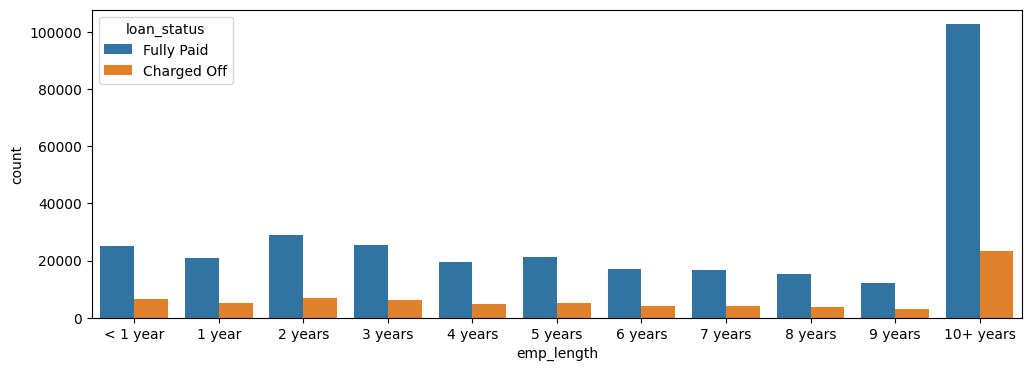

In [162]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

In [163]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']
emp_len = emp_co/emp_fp
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<Axes: xlabel='emp_length'>

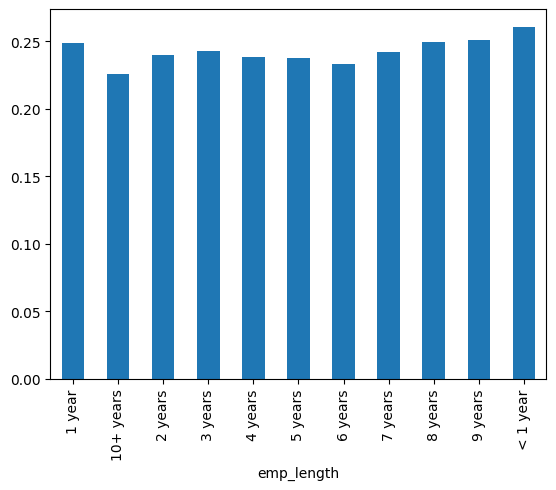

In [164]:
emp_len.plot(kind='bar')

Pelo fato dos dados de "emp_length" serem similares, optou-se por remover esta coluna

In [165]:
df = df.drop('emp_length', axis=1)

In [166]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [167]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [168]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

A coluna "title" é uma sub-categoria de "purpose", desta forma, optou-se em remove-la.

In [169]:
feat_info('mort_acc')

Number of mortgage accounts.


In [170]:
df.groupby('total_acc')['mort_acc'].mean()

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [171]:
df.drop('title', axis=1, inplace=True)

In [172]:
total_acc_avg = df.groupby('total_acc')['mort_acc'].mean()

In [173]:
total_acc_avg[2.0]

0.0

In [174]:
def fill_mort_acc(total_acc, mort_acc):
  if np.isnan(mort_acc):
    return total_acc_avg[total_acc]
  else:
    return mort_acc

In [175]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [176]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

A quantidade de valores np.NAN agora representa menos de 0,5% do dataset, desta forma optou-se por remove-los.

In [177]:
df.dropna(inplace=True)

In [178]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

Variaveis categóricas e Dummy

In [179]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

Coluna 'term'

In [180]:
df['term'].value_counts()

term
 36 months    301247
 60 months     93972
Name: count, dtype: int64

In [181]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

Coluna 'grade'

É um rótulo de sub-grade, esta coluna será descartada.

In [182]:
df = df.drop('grade', axis=1)

In [183]:
sub_grade_dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

In [184]:
df = pd.concat([df.drop('sub_grade',axis=1),sub_grade_dummies],axis=1)

In [185]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [186]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

Conversão em variaveis dummy: verification_status, application_type,initial_list_status,purpose

In [187]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

coluna "home_ownership"

In [188]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [189]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

Coluna address

In [190]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [191]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

Coluna "issue_d"

In [192]:
df = df.drop('issue_d',axis=1)

Coluna "earliest_cr_line"

In [193]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [194]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

Train Teste Split

In [195]:
df = df.drop('loan_status',axis=1)

In [196]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Normalizando os dados

In [198]:
scaler = MinMaxScaler()

In [199]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Criando o modelo

In [200]:
model = Sequential()


model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(units=1,activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam')

O input_shape explícito garante que a primeira camada receba o número correto de features após seu pré‑processamento.
​ EarlyStopping e class_weight ajudam a evitar overfitting e a focar na classe “Charged Off” se estiver desbalanceado.
​

In [201]:
model.fit(x=X_train,
          y=y_train,
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test),
          )

Epoch 1/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3579 - val_loss: 0.2621
Epoch 2/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2659 - val_loss: 0.2613
Epoch 3/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2637 - val_loss: 0.2600
Epoch 4/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2630 - val_loss: 0.2594
Epoch 5/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2619 - val_loss: 0.2594
Epoch 6/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2603 - val_loss: 0.2592
Epoch 7/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2626 - val_loss: 0.2590
Epoch 8/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2607 - val_loss: 0.2593
Epoch 9/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2603 - val_loss: 0.2593
Epoch 10/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2593 - val_loss: 0.2599
Epoch 11/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2591 - val_loss: 0.2589
Epoch 12/25
1236/1236 ━━━━━━━━

Avaliação da performace do modelo

In [203]:
losses = pd.DataFrame(model.history.history)

<Axes: >

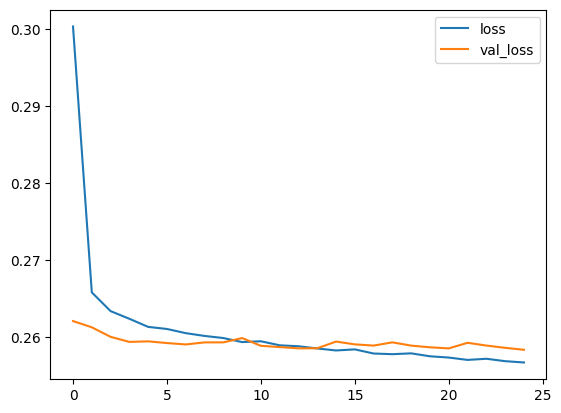

In [204]:
losses[['loss','val_loss']].plot()

In [205]:
predictions = model.predict(X_test)

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 2s 793us/step


In [206]:
print(f"ROC-AUC: {roc_auc_score(y_test, predictions):.3f}")

ROC-AUC: 0.903


In [214]:
predictions_proba = model.predict(X_test).ravel()
predictions_bin = (predictions_proba >= 0.3).astype(int)
confusion_matrix(y_test, predictions_bin)

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 1s 424us/step


array([[ 6646,  8775],
       [   11, 63612]], dtype=int64)


| Quadrante | Significado | Impacto no Banco |
|-----------|-------------|------------------|
| **TN** (Verdadeiro Negativo) | Risco **real** → **corretamente** rejeitado | **Evita prejuízo** |
| **FP** (Falso Positivo) | Seguro **real** → **erroneamente** rejeitado | **Perde venda** segura |
| **FN** (Falso Negativo) | Risco **real** → **erroneamente** aprovado | **PREJUÍZO** alto! |
| **TP** (Verdadeiro Positivo) | Seguro **real** → **corretamente** aprovado | **Negócio perfeito** |

Prioridade para Crédito --> **Minimizar FN** (Falsos Negativos) (**diminuir o Threshold = predictions_proba** faz com que **FN DIMINUA** e FP aumente)



In [228]:
model.save('modelo_ann_emprestimos.keras')